In [1]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [4]:
df = pd.read_csv('weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [5]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [122]:
# ваш код
avg_t_per_year = df.groupby(df['Day'].apply(lambda x: x.year)).mean()
print("самый холодный:", avg_t_per_year.idxmin()[0])
print("самый теплый:", avg_t_per_year.idxmax()[0])

самый холодный: 2012
самый теплый: 2015


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [73]:
# ваш код
croped = df[(df['Day'].apply(lambda x: x.month) == 1) & (df['t'] >= 0)]
croped.groupby(df['Day'].apply(lambda x: x.year)).agg({'t':'count'}).idxmax()[0]

2008

**3.** В каком году было самое холодное лето (по средней температуре)

In [81]:
# ваш код
f = df[df['Day'].apply(lambda x: x.month in (6,7,8))]
f.groupby(f['Day'].apply(lambda x: x.year)).mean().idxmin()[0]

2008

**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [100]:
# ваш код
ind = (df['t'] - df['t'].shift(-1)).abs().idxmax()
df.iloc[ind,0]

Timestamp('2014-05-26 00:00:00')

**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

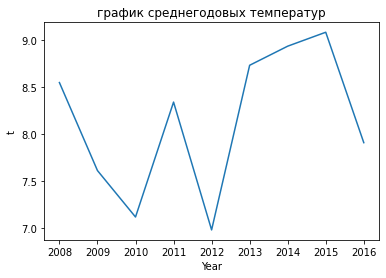

In [128]:
# ваш код
%matplotlib inline
data = df.groupby(df['Day'].apply(lambda x: x.year)).mean()['t']
plt.plot(data.index, data.values)
plt.xlabel('Year')
plt.ylabel('t')
plt.title('график среднегодовых температур')
plt.show()